In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with zero

In [19]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
df.isnull().sum().sum()

np.int64(0)

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [26]:
df["customerID"].duplicated().sum()

np.int64(0)

In [28]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

#converted 0 and 1 values of sinior citizen to yes/no 

In [31]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


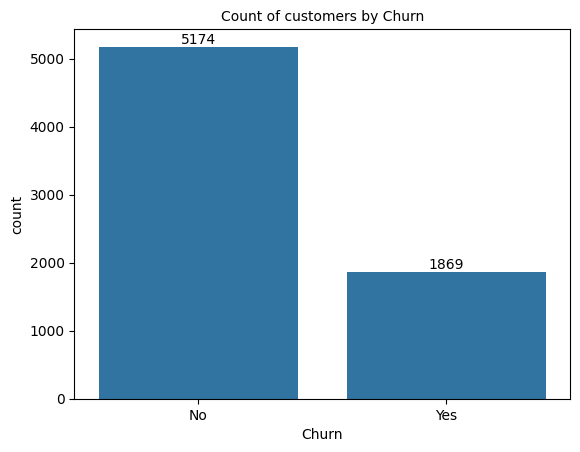

In [54]:
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn" ,fontsize=10)
plt.show()

#groupby for the pie chart/percentage

In [41]:
gb = df.groupby("Churn").agg({"Churn":"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


#To show percentage

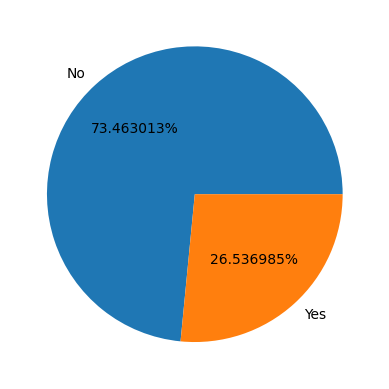

In [48]:
plt.pie(gb["Churn"],labels=gb.index, autopct="%2f%%")
plt.show()

#for figure size, fontsize as we want

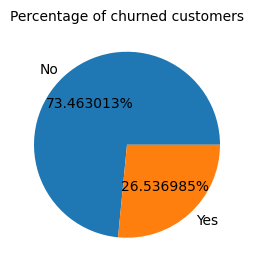

In [53]:
plt.figure(figsize=(3,4))
plt.pie(gb["Churn"],labels=gb.index, autopct="%2f%%")
plt.title("Percentage of churned customers", fontsize=10)
plt.show()

#From the chart we can say that 26.54% of the customers have chured out
#now let's explore the reason behind it

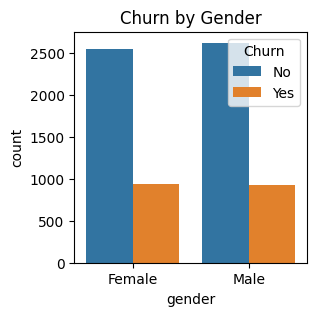

In [62]:
plt.figure(figsize=(3,3))
sns.countplot(x="gender",data=df, hue="Churn")
plt.title("Churn by Gender")
plt.show()

#almost same number in gander

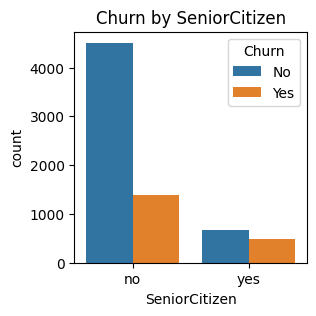

In [63]:
plt.figure(figsize=(3,3))
sns.countplot(x="SeniorCitizen",data=df, hue="Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

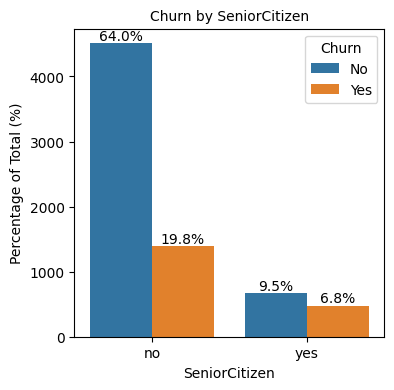

In [68]:
# Total number of rows
total = len(df)

plt.figure(figsize=(4,4))
ax = sns.countplot(x="SeniorCitizen", data=df, hue="Churn")

# Convert counts to percentages on the bars
for container in ax.containers:
    labels = [
        f"{(v.get_height() / total) * 100:.1f}%"
        for v in container
    ]
    ax.bar_label(container, labels=labels)

ax.set_ylabel("Percentage of Total (%)",fontsize=10)
ax.set_title("Churn by SeniorCitizen",fontsize=10)

plt.show()

#in senior citizen catagory comparatively more people have churned out

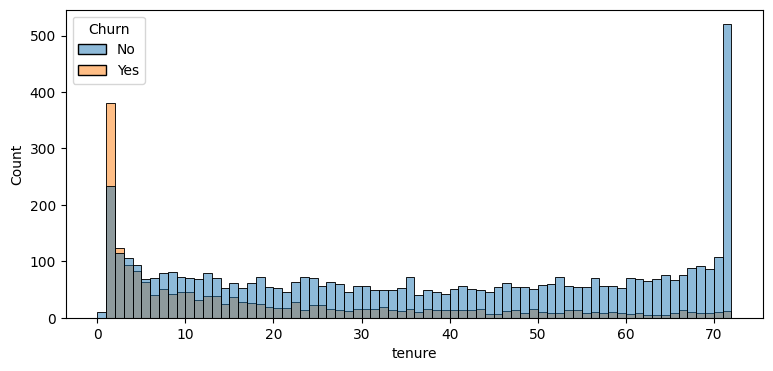

In [71]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data=df, bins=72, hue="Churn")
plt.show()

#people who have taken our sevices of a long perion of time have stayed and who have taken for 1/2 months have churned out

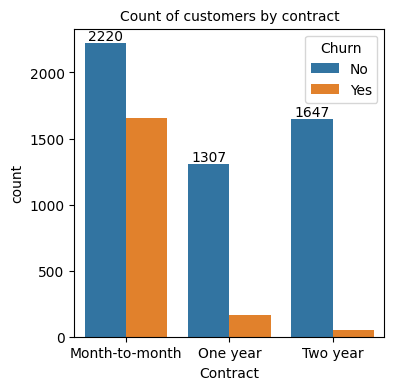

In [75]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers by contract" ,fontsize=10)
plt.show()

#Customers on month-to-month contracts churn significantly more than those on longer-term contracts. 
#One-year and two-year contracts show much lower churn, indicating that longer commitments help retain customers.

In [76]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

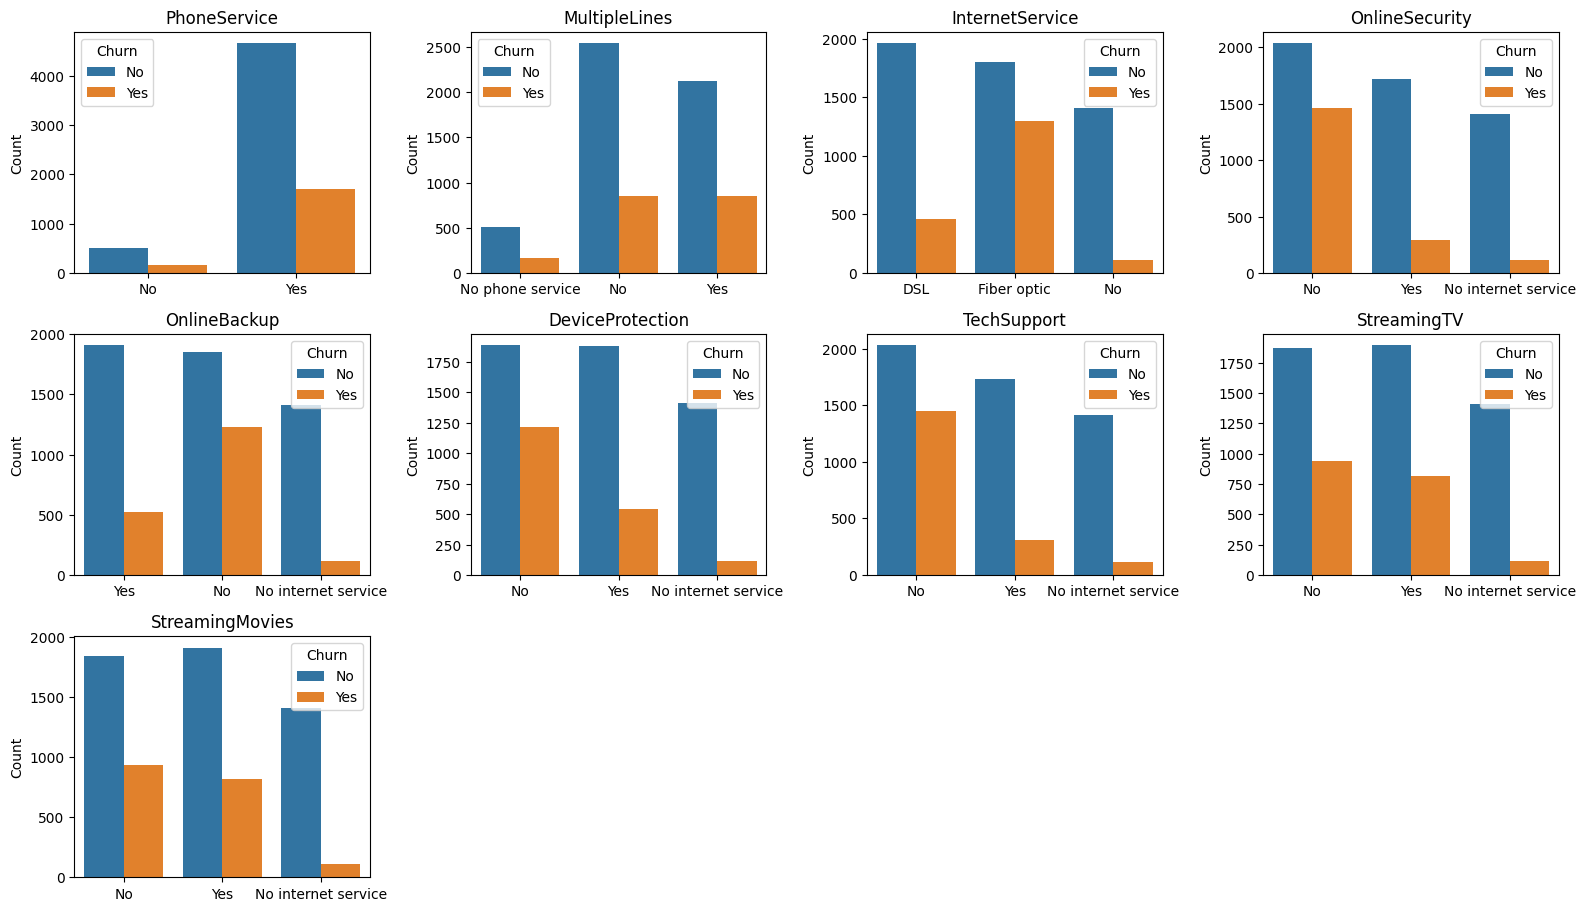

In [84]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Grid size (3x3 for 9 columns)
fig, axes = plt.subplots(4,4, figsize=(16, 12))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.countplot(data=df, x=col, ax=ax, hue=df["Churn"])
    ax.set_title(f"{col}")
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=0)

# Remove empty subplots if any
for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


#Customers without services like OnlineSecurity, TechSupport, OnlineBackup, and DeviceProtection show higher churn compared to those who have these services.
#Fiber optic internet users have higher churn than DSL users, while customers with no internet service churn the least.
#Streaming services (TV and Movies) have a relatively smaller impact on churn compared to security and support-related services.

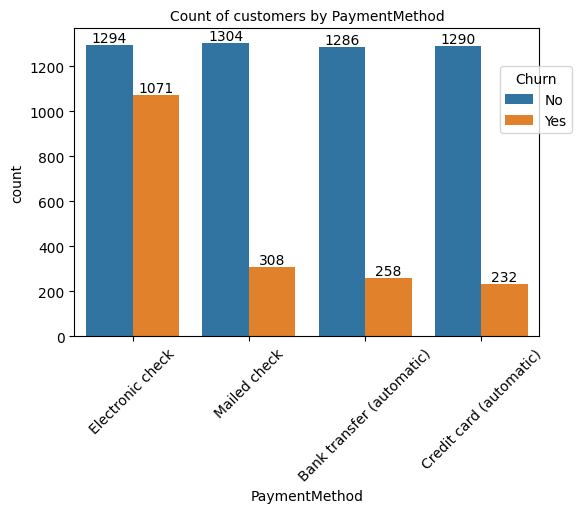

In [90]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.legend(title="Churn",bbox_to_anchor=(0.9,0.9)) #customize legend location
plt.title("Count of customers by PaymentMethod" ,fontsize=10)
plt.show()